# KMeans
KMeans is a popular unsupervised machine learning algorithm used for clustering data. The algorithm attempts to partition a set of data points into K clusters, where K is a user-defined parameter representing the desired number of clusters.

The KMeans algorithm works by first randomly selecting K initial centroids, one for each cluster. Each data point is then assigned to the cluster whose centroid is closest to it. The centroid of each cluster is then updated to be the mean of all the data points assigned to that cluster. This process of reassigning data points and updating centroids is repeated iteratively until convergence, which occurs when the assignments of data points to clusters no longer change.

KMeans has a number of applications in fields such as image segmentation, document clustering, and market segmentation. One of the key advantages of KMeans is its simplicity and scalability, which makes it well-suited for large datasets. However, KMeans is sensitive to the initial placement of centroids, and the algorithm may converge to a suboptimal solution if the initial centroids are poorly chosen.

In summary, KMeans is a powerful algorithm for clustering data, and is widely used in both academic and industrial applications.

# Principal Component Analysis

PCA, or Principal Component Analysis, is a popular unsupervised machine learning algorithm used for dimensionality reduction. The algorithm attempts to find a lower-dimensional representation of a dataset that captures as much of the variation in the data as possible.

PCA works by identifying the principal components of the data, which are linear combinations of the original features that account for the largest amount of variance in the data. The first principal component is chosen to be the direction in the feature space that maximizes the variance of the projected data. Subsequent principal components are chosen to be orthogonal to the previous components and also maximize the variance of the projected data.

Once the principal components are identified, the data can be projected onto a lower-dimensional subspace spanned by the first k principal components, where k is a user-defined parameter representing the desired dimensionality of the new representation. This new representation can be used in downstream machine learning tasks, such as classification or clustering.

PCA has a number of applications in fields such as image processing, signal processing, and bioinformatics. One of the key advantages of PCA is its ability to capture the most important patterns in high-dimensional data, while reducing the computational complexity of downstream machine learning tasks. However, PCA assumes that the data is linearly separable, and may not be effective for datasets with nonlinear structure.

In summary, PCA is a powerful algorithm for dimensionality reduction and feature extraction, and is widely used in both academic and industrial applications.

# MLP Classifier
MLP Classifier, or Multi-Layer Perceptron Classifier, is a popular supervised machine learning algorithm used for classification tasks. It is a type of neural network that consists of multiple layers of nodes, each layer connected to the next layer via weighted connections.

The MLP Classifier works by taking in a set of input features and using the weights and biases of the neural network to make a prediction about the class label of the input. During training, the weights and biases of the neural network are adjusted using an optimization algorithm such as stochastic gradient descent, to minimize the error between the predicted output and the true output.

MLP Classifier has a number of advantages over other classification algorithms, including its ability to model complex nonlinear relationships between the input features and the output class labels. It is also capable of handling high-dimensional datasets with a large number of input features. However, MLP Classifier can be sensitive to the initial values of the weights and biases, and may require careful tuning of the hyperparameters such as the learning rate, regularization strength, and number of hidden layers and nodes.

In summary, MLP Classifier is a powerful algorithm for classification tasks, and is widely used in both academic and industrial applications. It is a versatile algorithm that can be applied to a wide range of datasets, but requires careful tuning of hyperparameters to achieve optimal performance.


In [2]:
#importing the library
import numpy as np
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
#Standardscaler
from sklearn.preprocessing import StandardScaler
#train_test_split
from sklearn.model_selection import train_test_split
#kmean
from sklearn.cluster import KMeans
#Principal Component Analysis
from sklearn.decomposition import PCA
#neural network
from sklearn.neural_network import MLPClassifier

# Loading the Dataset

In [3]:
df=pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
#loading the dataset
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Preprocessing the Dataset

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

# Splitting between x and y

In [6]:
y=df['quality']
x=df.drop('quality',axis=1)

In [9]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Scaling the Dataset

In [10]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [11]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


# Clustering the Dataset

In [13]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [16]:
clusters=kmeans.predict(x)
clusters

array([3, 3, 3, ..., 1, 3, 1], dtype=int32)

# Visualizing the Clusters

# Reducing the Dimensions

In [17]:
pca=PCA(n_components=2)
reduced_x=pd.DataFrame(pca.fit_transform(x),columns=['PC1','PC2'])


In [18]:
reduced_x

,PC1,PC2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


In [20]:
reduced_x['Cluster']=clusters

In [21]:
reduced_x

,PC1,PC2,Cluster
0,-1.619530,0.450950,3
1,-0.799170,1.856553,3
2,-0.748479,0.882039,3
3,2.357673,-0.269976,0
4,-1.619530,0.450950,3
...,...,...,...
1594,-2.150500,0.814286,1
1595,-2.214496,0.893101,1
1596,-1.456129,0.311746,1
1597,-2.270518,0.979791,3


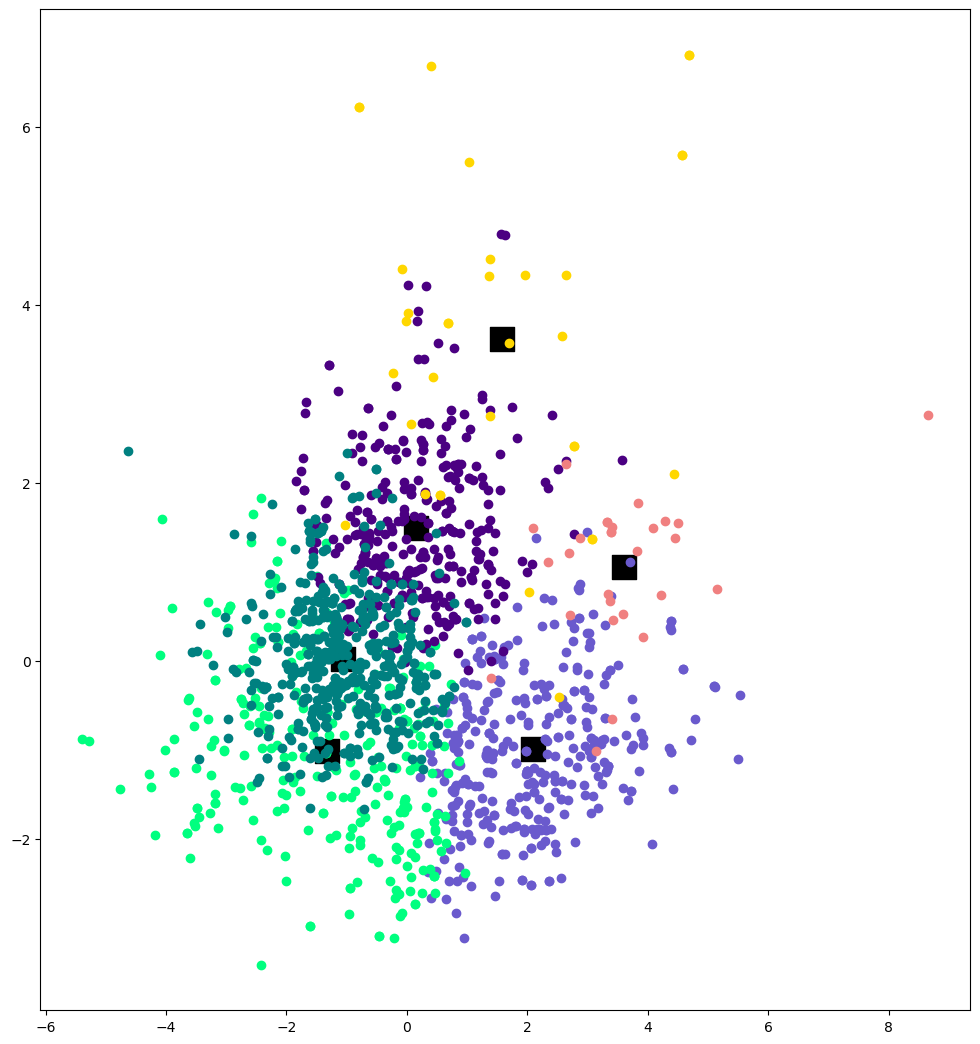

In [37]:
plt.figure(figsize=(12,13))
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='s',s=300)
plt.scatter(reduced_x[reduced_x['Cluster']==0].loc[:,'PC1'],reduced_x[reduced_x['Cluster']==0].loc[:,'PC2'],color='slateblue')
plt.scatter(reduced_x[reduced_x['Cluster']==1].loc[:,'PC1'],reduced_x[reduced_x['Cluster']==1].loc[:,'PC2'],color='springgreen')
plt.scatter(reduced_x[reduced_x['Cluster']==2].loc[:,'PC1'],reduced_x[reduced_x['Cluster']==2].loc[:,'PC2'],color='indigo')
plt.scatter(reduced_x[reduced_x['Cluster']==3].loc[:,'PC1'],reduced_x[reduced_x['Cluster']==3].loc[:,'PC2'],color='teal')
plt.scatter(reduced_x[reduced_x['Cluster']==4].loc[:,'PC1'],reduced_x[reduced_x['Cluster']==4].loc[:,'PC2'],color='lightcoral')
plt.scatter(reduced_x[reduced_x['Cluster']==5].loc[:,'PC1'],reduced_x[reduced_x['Cluster']==5].loc[:,'PC2'],color='gold')


plt.show()

In [36]:
reduced_x[reduced_x['Cluster']==0].loc[:,'PC1']

3       2.357673
13      1.538898
47      1.233094
56      2.301099
75      0.913535
          ...   
1508    0.824665
1543    1.323622
1544    0.744937
1548    2.230514
1576    0.913681
Name: PC1, Length: 363, dtype: float64

# Getting Clusters Centers

In [23]:
reduced_centers=pca.transform(kmeans.cluster_centers_)
reduced_centers

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


array([[ 2.09298218, -0.99767127],
       [-1.32343353, -1.01945337],
       [ 0.14381342,  1.49067635],
       [-1.05952927,  0.01983534],
       [ 3.59939563,  1.05498421],
       [ 1.58571538,  3.62081388]])

# Clusters Center in 11 dimentions

In [25]:
kmeans.cluster_centers_

array([[ 1.33799383e+00, -6.73360431e-01,  1.12583206e+00,
         7.59583143e-02, -6.69548430e-03, -5.71834219e-01,
        -5.46842750e-01,  7.65067409e-01, -8.46484486e-01,
         3.48095380e-01,  1.76935358e-01],
       [-6.92918829e-01, -4.34372506e-01, -1.51579663e-01,
        -2.56819880e-01, -4.16833031e-01,  1.15191886e-01,
        -2.43601332e-01, -1.23892827e+00,  6.37282376e-01,
         1.37939147e-01,  1.28997771e+00],
       [-7.48185194e-02,  2.81956972e-02,  7.86612459e-02,
        -1.74111543e-02, -3.47325911e-02,  1.01453742e+00,
         1.22878617e+00,  2.26953549e-01, -1.29556721e-01,
        -1.72363427e-01, -5.62046513e-01],
       [-4.71338545e-01,  6.90113488e-01, -8.21115359e-01,
        -1.91498399e-01, -6.00138041e-02, -4.32847578e-01,
        -4.09141538e-01, -5.15401664e-02,  4.10773808e-01,
        -3.96953730e-01, -4.24773445e-01],
       [ 9.54162998e-02,  2.19980305e-03,  1.18155266e+00,
        -3.89872163e-01,  5.78475973e+00, -4.95156003e-02,
  

# Training the Model

In [39]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [40]:
model=MLPClassifier(hidden_layer_sizes=(256,256),max_iter=500)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.63125